In [93]:
import numpy as np
from numpy import nan
import pandas as pd
from pandas import Series, DataFrame
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.externals import joblib

import scipy
from scipy import stats

from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
from pylab import savefig

import statsmodels.api as sm
import statsmodels.formula.api as smf

#importing all packages that I will be using
#**NOTE: DELETE ANYTHING THAT DOESN'T MAKE INTO FINAL VERSION

In [43]:
address = '~/Desktop/code/indeedpsci.csv'
indeed = pd.read_csv(address)

#read in the data from where it is saved on my computer

In [44]:
indeed.describe()
#take a look at the columns/features/variables

,Unnamed: 0,advertiser_id,assigned,age,assign_days,revenue
count,77891.000000,7.789100e+04,77891.000000,77891.000000,77891.000000,3.340000e+03
mean,38945.000000,7.924271e+06,0.476037,309.958532,120.482546,4.865177e+07
std,22485.339246,3.918985e+06,0.499429,488.801166,39.527908,1.736891e+08
min,0.000000,4.850000e+02,0.000000,-27.000000,-2.000000,1.200000e+04
25%,19472.500000,4.317428e+06,0.000000,0.000000,136.000000,6.398444e+06
50%,38945.000000,1.078788e+07,0.000000,0.000000,137.000000,1.514775e+07
75%,58417.500000,1.080747e+07,1.000000,523.000000,138.000000,3.704959e+07
max,77890.000000,1.119963e+07,1.000000,3855.000000,138.000000,6.533791e+09


In [45]:
indeed.revenue.describe()
#no value for revenue=missing, so min is not 0

count    3.340000e+03
mean     4.865177e+07
std      1.736891e+08
min      1.200000e+04
25%      6.398444e+06
50%      1.514775e+07
75%      3.704959e+07
max      6.533791e+09
Name: revenue, dtype: float64

In [46]:
print(indeed.revenue)

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
5                NaN
6                NaN
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN
12               NaN
13               NaN
14               NaN
15               NaN
16               NaN
17               NaN
18               NaN
19               NaN
20       707100000.0
21               NaN
22               NaN
23               NaN
24               NaN
25               NaN
26               NaN
27               NaN
28               NaN
29               NaN
            ...     
77861            NaN
77862            NaN
77863            NaN
77864            NaN
77865            NaN
77866            NaN
77867            NaN
77868            NaN
77869            NaN
77870            NaN
77871            NaN
77872            NaN
77873            NaN
77874            NaN
77875            NaN
77876            NaN
77877        

In [48]:
indeed.duplicated('advertiser_id')
ad_dups = indeed.advertiser_id[indeed.advertiser_id.duplicated()].values
ad_dups
#there are no duplicate entries for advertiser_id
#so, there are 77,890 leads represented in this dataset

array([], dtype=int64)

In [15]:
#http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-21.html
indeed.groupby('assigned').sum()

,Unnamed: 0,advertiser_id,age,assign_days,revenue
assigned,,,,,
0,2253990330,436019039498,485986,5061299,4.240371e+10
1,779474665,181210348724,23656994,4323207,1.200932e+11


In [17]:
#note: haven't changed the NaN's to 0's yet
#but, without 0s, assigned leads have larger ages
#fewer assign_days, and more revenue than unassigned
#next, try PearsonR?

In [49]:
#np.nan_to_num(indeed.revenue, copy=True)
#rev2 = np.nan_to_num(indeed.revenue)
#DataFrame.fillna()
indeed['revenue2']=indeed['revenue'].fillna(0)
#above things do not work... instead, it is fixed now

In [51]:
indeed.describe()

,Unnamed: 0,advertiser_id,assigned,age,assign_days,revenue,revenue2
count,77891.000000,7.789100e+04,77891.000000,77891.000000,77891.000000,3.340000e+03,7.789100e+04
mean,38945.000000,7.924271e+06,0.476037,309.958532,120.482546,4.865177e+07,2.086209e+06
std,22485.339246,3.918985e+06,0.499429,488.801166,39.527908,1.736891e+08,3.728792e+07
min,0.000000,4.850000e+02,0.000000,-27.000000,-2.000000,1.200000e+04,0.000000e+00
25%,19472.500000,4.317428e+06,0.000000,0.000000,136.000000,6.398444e+06,0.000000e+00
50%,38945.000000,1.078788e+07,0.000000,0.000000,137.000000,1.514775e+07,0.000000e+00
75%,58417.500000,1.080747e+07,1.000000,523.000000,138.000000,3.704959e+07,0.000000e+00
max,77890.000000,1.119963e+07,1.000000,3855.000000,138.000000,6.533791e+09,6.533791e+09


In [52]:
indeed.groupby('assigned').sum()
#I think this looks the same as it did above...
#not sure why

,Unnamed: 0,advertiser_id,age,assign_days,revenue,revenue2
assigned,,,,,,
0,2253990330,436019039498,485986,5061299,4.240371e+10,4.240371e+10
1,779474665,181210348724,23656994,4323207,1.200932e+11,1.200932e+11


In [53]:
indeed.groupby('assigned').mean()
#here, age is bigger for assigned, assigned days
#are smaller, and revenue is bigger

,Unnamed: 0,advertiser_id,age,assign_days,revenue,revenue2
assigned,,,,,,
0,55228.617318,1.068360e+07,11.907919,124.014971,2.388942e+07,1.039001e+06
1,21021.998031,4.887142e+06,638.015966,116.594487,7.673686e+07,3.238846e+06


In [54]:
indeed.groupby('assigned').median()
#here, assign days and revenue median is 0 - the same
#b/w assigned and unassigned. but age bigger for assigned

,Unnamed: 0,advertiser_id,age,assign_days,revenue,revenue2
assigned,,,,,,
0,55528.5,10804573.5,0.0,137.0,12353345.0,0.0
1,18882.0,4115693.0,544.0,138.0,23180091.0,0.0


In [55]:
indeed.groupby('assigned').describe()
#40,812 are unassigned
#37,079 are assigned 

Unnamed: 0                                                       \
              count          mean           std   min       25%      50%   
assigned                                                                   
0           40812.0  55228.617318  13686.097612  33.0  44296.75  55528.5   
1           37079.0  21021.998031  15582.937167   0.0   9409.50  18882.0   

                            advertiser_id                    ...       \
               75%      max         count          mean      ...        
assigned                                                     ...        
0         66938.25  77824.0       40812.0  1.068360e+07      ...        
1         28417.50  77890.0       37079.0  4.887142e+06      ...        

             revenue               revenue2                                   \
                 75%           max    count          mean           std  min   
assigned                                                                       
0         24672039.5  6.533791e+09  40812.0  1.039001e+06  3.322616e+07  0.0   
1         58548372.0  2.500000e+09  37079.0  3.238846e+06  4.126909e+07  0.0   

                                       
          25%  50%  75%           max  
assigned                               
0         0.0  0.0  0.0  6.533791e+09  
1         0.0  0.0  0.0  2.500000e+09  

[2 rows x 48 columns]

In [56]:
rcParams['figure.figsize'] = 5, 4 #this is the size of the plot
sb.set_style('whitegrid') #this is the style: white grid

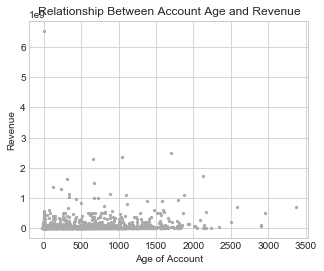

In [59]:
indeed.plot(kind='scatter', x='age', y='revenue', c=['darkgray'], s=5)
plt.xlabel('Age of Account')
plt.ylabel('Revenue') 
plt.title('Relationship Between Account Age and Revenue')
plt.show()
#need to fix the sizing - find from DSLynda
#so many 0's that it's hard to see the relationship

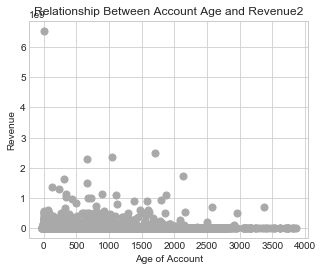

In [58]:
indeed.plot(kind='scatter', x='age', y='revenue2', c=['darkgray'], s=50)
plt.xlabel('Age of Account')
plt.ylabel('Revenue') 
plt.title('Relationship Between Account Age and Revenue2')
plt.show()
#need to fix the sizing - find from DSLynda
#so many 0's that it's hard to see the relationship


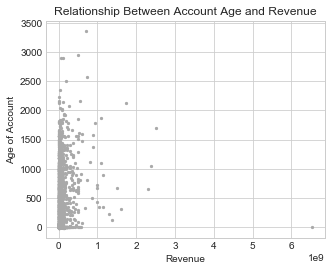

In [60]:
indeed.plot(kind='scatter', x='revenue', y='age', c=['darkgray'], s=5)
plt.xlabel('Revenue')
plt.ylabel('Age of Account') 
plt.title('Relationship Between Account Age and Revenue')
plt.show()

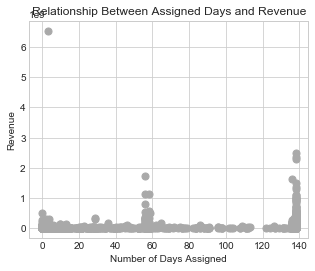

In [62]:
indeed.plot(kind='scatter', x='assign_days', y='revenue', c=['darkgray'], s=50)
plt.xlabel('Number of Days Assigned')
plt.ylabel('Revenue') 
plt.title('Relationship Between Assigned Days and Revenue')
plt.show()
#biggest revenue comes from 0 days assigned
#then spikes in revenue around 60 days, and
#again at the end of the period of observation

In [68]:
#plot only for assigned
indeed.age_asgn = indeed.age[indeed.assigned==1]
indeed.rev_asgn = indeed.revenue[indeed.assigned==1]
indeed.age_nsgn = indeed.age[indeed.assigned==0]
indeed.rev_nsgn = indeed.revenue[indeed.assigned==0]

In [70]:
#indeed.plot(kind='scatter', x='age_asgn', y='rev_asgn', c=['darkgray'], s=50)
#plt.xlabel('Age')
#plt.ylabel('Revenue') 
#plt.title('Relationship Between Age and Revenue: Assigned')
#plt.show()

In [74]:
pearsonr_coefficient, p_value = pearsonr(indeed.age, indeed.revenue2)
print 'PearsonR Correlation Coefficient %0.3f' % (pearsonr_coefficient)
#significant correlation b/w age and revenue

table = pd.crosstab(indeed.assigned, indeed.revenue)
chi2, p, dof, expected = chi2_contingency(table.values)
print 'Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p)
#Revenue of Assigned and unassigned groups significantly different

PearsonR Correlation Coefficient 0.027
Chi-square Statistic 3131.347 p_value 0.017


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [96]:
indeed.anyfirstrev

1

In [103]:
pd.isnull(indeed.first_revenue_date)

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10       False
11        True
12       False
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20       False
21        True
22        True
23       False
24        True
25       False
26        True
27        True
28        True
29        True
         ...  
77861     True
77862     True
77863     True
77864     True
77865     True
77866     True
77867     True
77868     True
77869     True
77870     True
77871     True
77872     True
77873     True
77874     True
77875     True
77876     True
77877     True
77878    False
77879    False
77880     True
77881     True
77882     True
77883     True
77884     True
77885     True
77886    False
77887     True
77888     True
77889     True
77890     True
Name: first_revenue_date, Length: 77891, dtype: bool

In [160]:
#indeed.loc[indeed.first_revenue_date!=nan, '']
#https://pandas.pydata.org/pandas-docs/stable/cookbook.html

In [161]:
indeed

,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue,revenue2,anyfirstrev
0,0,485,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-07-14,3855,138,NaN,0.0,<bound method Series.fillna of 0 ...
1,1,598,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-08-02,3836,138,NaN,0.0,<bound method Series.fillna of 0 ...
2,2,673,1,2017-02-01 00:00:00.000000,2017-04-28 15:36:30.000000,NaN,2006-08-17,3821,86,NaN,0.0,<bound method Series.fillna of 0 ...
3,3,813,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-09-12,3795,138,NaN,0.0,<bound method Series.fillna of 0 ...
4,4,1132,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-02,3744,138,NaN,0.0,<bound method Series.fillna of 0 ...
5,5,1181,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-08,3738,138,NaN,0.0,<bound method Series.fillna of 0 ...
6,6,1183,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-09,3737,138,NaN,0.0,<bound method Series.fillna of 0 ...
7,7,1240,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-21,3725,138,NaN,0.0,<bound method Series.fillna of 0 ...
8,8,1339,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-12-11,3705,138,NaN,0.0,<bound method Series.fillna of 0 ...
9,9,1395,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-12-22,3694,138,NaN,0.0,<bound method Series.fillna of 0 ...


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [141]:
indeed['anyfirstrev'] = 

In [142]:
indeed

,Unnamed: 0,advertiser_id,assigned,date_assignment_starts,date_assignment_ends,first_revenue_date,date_created,age,assign_days,revenue,revenue2,anyfirstrev
0,0,485,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-07-14,3855,138,NaN,0.0,1
1,1,598,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-08-02,3836,138,NaN,0.0,1
2,2,673,1,2017-02-01 00:00:00.000000,2017-04-28 15:36:30.000000,NaN,2006-08-17,3821,86,NaN,0.0,1
3,3,813,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-09-12,3795,138,NaN,0.0,1
4,4,1132,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-02,3744,138,NaN,0.0,1
5,5,1181,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-08,3738,138,NaN,0.0,1
6,6,1183,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-09,3737,138,NaN,0.0,1
7,7,1240,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-11-21,3725,138,NaN,0.0,1
8,8,1339,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-12-11,3705,138,NaN,0.0,1
9,9,1395,1,2017-02-01 00:00:00.000000,2017-06-19 12:12:37.888680,NaN,2006-12-22,3694,138,NaN,0.0,1


In [ ]:
#indeed['anyfirstrev']=indeed['first_revenue_date'].fillna

#indeed['anyfirstrev'] = indeed['first_revenue_date'].apply(lambda x: '1' if x!=nan else '0')

#indeed.anyfirstrev = np.where(indeed['first_revenue_date']==nan, 0, 1)
#doesn't work... 
#indeed['anyfirstrev'] = np.where(indeed['first_revenue_date']==nan, '0', '1')
#indeed['anyfirstrev'] = np.where(indeed['first_revenue_date']!=nan, '1', '0')
#doesn't work...

#anyfirstrev=[] 
#for row in indeed['first_revenue_date']:
 #   if row!='NaN':
  #      anyfirstrev.append('1')
   # else:
    #    anyfirstrev.append('0')
#Still doesn't work. all have values of 1

In [ ]:
if pd.isnull(indeed.first_revenue_date==True):
    indeed.anyfirstrev=1
else:
    indeed.anyfirstrev=0

In [88]:
y=indeed.revenue2
X=indeed.drop(['revenue2', 'revenue'], axis=1)

results = sm.OLS(y.astype(float), X.astype(float)).fit()
print(results.summary())

ValueError: invalid literal for float(): 2017-02-28